<a href="https://colab.research.google.com/github/harsh43580/Machine-Learning-Models/blob/main/Assignemnt_1_Support_ticket_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Documentation**

# Support Ticket Classification and Entity Extraction Project
## Assignment Documentation

### Project Introduction

For this assignment, I developed an automated system to classify customer support tickets and extract relevant information from them. The system addresses a real-world problem where customer service teams need to quickly categorize and prioritize incoming support requests.

The main objectives of this project were to:
1. Automatically classify support tickets by issue type (Technical, Billing, Account, etc.)
2. Determine the urgency level of each ticket (Low, Medium, High)
3. Extract key entities such as product names, dates, and complaint-related keywords
4. Create an interactive interface for testing the system

### Dataset and Problem Analysis

The dataset contained 1,000 customer support tickets with varying lengths and writing styles. During my initial exploration, I discovered several challenges:

**Data Quality Issues:**
- Some tickets were extremely short (single words like "help") while others were lengthy descriptions
- Missing labels for some tickets required data cleaning
- Inconsistent formatting with mixed capitalization and excessive punctuation

**Class Distribution:**
- The urgency levels were imbalanced, with most tickets being "Medium" priority
- Issue types showed some overlap in language patterns (e.g., "billing error" vs "payment failed")

### Technical Approach and Methodology

#### Text Preprocessing Pipeline

I implemented a comprehensive text preprocessing pipeline to standardize the ticket content:

1. **Text Normalization:**
   - Converted all text to lowercase for consistency
   - Removed excessive punctuation while preserving meaningful punctuation for sentiment analysis
   - Eliminated irrelevant numbers while keeping dates and error codes

2. **Tokenization and Cleaning:**
   - Split text into individual words using NLTK's word tokenizer
   - Removed common English stopwords that don't contribute to classification
   - Applied lemmatization to reduce words to their root forms (e.g., "running" → "run")

3. **Feature Engineering:**
   I created several additional features beyond the basic text processing:
   - **Character and word counts:** To capture ticket length characteristics
   - **Sentiment analysis:** Using TextBlob to detect emotional tone
   - **Urgency indicators:** Binary flags for urgent keywords like "emergency," "urgent," "asap"
   - **Punctuation patterns:** Counting exclamation marks and question marks as urgency signals

#### Machine Learning Models

I chose different algorithms for each classification task based on their strengths:

**Issue Type Classification - Logistic Regression:**
I selected logistic regression because:
- It handles high-dimensional sparse data (TF-IDF vectors) effectively
- Provides interpretable coefficients for understanding feature importance
- Fast training and prediction times
- Performs well on text classification tasks

**Urgency Level Classification - Random Forest:**
Random Forest was chosen for urgency prediction because:
- It can capture complex interactions between features
- The `class_weight='balanced'` parameter helps with the imbalanced dataset
- Less prone to overfitting than individual decision trees
- Can handle both numerical and categorical features well

#### Feature Extraction Strategy

**TF-IDF Vectorization:**
I used TF-IDF (Term Frequency-Inverse Document Frequency) to convert text into numerical features. This approach:
- Gives higher weights to words that are frequent in a document but rare across the corpus
- Reduces the impact of common words that appear in many tickets
- Creates a sparse matrix that's computationally efficient

**Additional Engineered Features:**
Beyond TF-IDF, I added custom features that I believed would improve classification:

| Feature | Description | Rationale |
|---------|-------------|-----------|
| `char_count` | Total characters in ticket | Urgent tickets might be shorter/longer |
| `word_count` | Number of words | Similar reasoning to character count |
| `sentiment` | Sentiment polarity score | Negative sentiment might indicate urgency |
| `has_urgent_words` | Contains urgent keywords | Direct indicator of priority |
| `starts_with_urgent` | Begins with urgent words | Position of urgent words matters |
| `exclam_count` | Number of exclamation marks | Emotional intensity indicator |
| `question_count` | Number of question marks | Might indicate confusion/frustration |

### Entity Extraction Implementation

I implemented rule-based entity extraction for three categories:

1. **Product Names:** Created a predefined list of products and used string matching to identify mentions
2. **Dates:** Used regular expressions to find date patterns like "MM/DD/YYYY" or "YYYY-MM-DD"
3. **Complaint Keywords:** Searched for specific complaint-related terms using keyword matching

While this approach is simpler than using Named Entity Recognition models, it was effective for the scope of this assignment and provided interpretable results.

### Technical Challenges and Solutions

#### Challenge 1: Feature Dimensionality Mismatch
**Problem:** After training, when processing new tickets, the TF-IDF feature dimensions didn't match the training data.

**Solution:** I ensured that:
- The TF-IDF vectorizer was fitted only on training data
- New data was transformed (not fit_transformed) using the same vectorizer
- Additional features were always added in the same order and quantity

#### Challenge 2: Imbalanced Classes
**Problem:** The urgency levels were not evenly distributed, leading to biased predictions.

**Solution:** Used `class_weight='balanced'` in the Random Forest classifier to automatically adjust for class imbalance.

#### Challenge 3: Text Variability
**Problem:** Huge variation in ticket writing styles and lengths.

**Solution:** Implemented robust preprocessing that could handle various text formats while preserving important information.

### User Interface Development

I created a Gradio interface that allows users to:
- Input new support tickets
- View predicted issue type and urgency level
- See extracted entities (products, dates, complaints)
- Get confidence scores for predictions

The interface makes the system accessible to non-technical users and provides immediate feedback on the model's performance.

### Results and Evaluation

**Model Performance:**
- Issue Type Classification: Achieved good accuracy on most categories, with some confusion between similar types
- Urgency Classification: Performed well on extreme cases (very urgent vs. not urgent) but struggled with medium priority tickets

**Entity Extraction:**
- Successfully identified most product mentions and dates
- Complaint keyword detection worked well for obvious cases
- Some false positives occurred with ambiguous terms

### Limitations and Future Improvements

**Current Limitations:**
1. **Rule-based entity extraction** is limited compared to more sophisticated NER models
2. **Small dataset size** may limit generalization to unseen ticket types
3. **Simple feature engineering** could be enhanced with more domain-specific features
4. **No real-time learning** - models are static after training

**Potential Improvements:**
1. **Use pre-trained language models** like BERT for better text understanding
2. **Implement active learning** to continuously improve with new data
3. **Add more sophisticated entity extraction** using spaCy or custom NER models
4. **Create ensemble methods** combining multiple algorithms
5. **Add multilingual support** for international customer bases

### Technical Stack and Dependencies

- **Python Libraries:** scikit-learn, pandas, numpy, nltk, textblob
- **ML Models:** Logistic Regression, Random Forest
- **UI Framework:** Gradio
- **Text Processing:** TF-IDF, regular expressions, tokenization
- **Visualization:** matplotlib, seaborn for data exploration

### Conclusion

This project successfully demonstrates the application of machine learning and natural language processing techniques to solve a practical business problem. The system can automatically classify support tickets and extract relevant information, which would help customer service teams prioritize their work more effectively.

While the current implementation uses traditional ML approaches with a dataset of 1,000 tickets, it provides a solid foundation that could be enhanced with more advanced techniques like deep learning or transformer models. The modular design makes it easy to swap out components and experiment with different approaches.

The most valuable learning from this project was understanding the importance of thorough data preprocessing and feature engineering in text classification tasks. The challenges faced with dimensionality matching and class imbalance provided practical experience in debugging and optimizing machine learning pipelines.

---

### Appendix: Code Structure

```
project/
├── data_preprocessing.py    # Text cleaning and feature engineering
├── model_training.py       # Model training and evaluation
├── entity_extraction.py    # Rule-based entity extraction
├── gradio_interface.py     # User interface implementation
├── utils.py               # Helper functions
└── main.py               # Main execution script
```

This structure ensures modularity and makes the code easy to maintain and extend for future improvements.

# Importing Libraries

In [ ]:
#  Standard ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Preprocessing & Utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

# Text Cleaning
import re
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Data Handling
import pandas as pd
import numpy as np

#  Visualization (optional but powerful)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Model Prediction
from textblob import TextBlob
from scipy.sparse import hstack
import string

# Gradio (for later)
import gradio as gr


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Data Preprocessing


In [ ]:
df = pd.read_excel('/content/ai_dev_assignment_tickets_complex_1000.xls')
df.head()


,ticket_id,ticket_text,issue_type,urgency_level,product
0,1,Payment issue for my SmartWatch V2. I was unde...,Billing Problem,Medium,SmartWatch V2
1,2,Can you tell me more about the UltraClean Vacu...,General Inquiry,NaN,UltraClean Vacuum
2,3,I ordered SoundWave 300 but got EcoBreeze AC i...,Wrong Item,Medium,SoundWave 300
3,4,Facing installation issue with PhotoSnap Cam. ...,Installation Issue,Low,PhotoSnap Cam
4,5,Order #30903 for Vision LED TV is 13 days late...,Late Delivery,NaN,Vision LED TV


In [ ]:
# First, let's look at the missing values
print(df.isnull().sum())

df = df.copy()  # ensures we’re working on a fresh clone

df.fillna({
    'urgency_level': df['urgency_level'].mode()[0],
    'issue_type': df['issue_type'].mode()[0],
    'ticket_text': ''
}, inplace=True)



ticket_id         0
ticket_text      55
issue_type       76
urgency_level    52
product           0
dtype: int64


In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if not isinstance(text, str):  # handles NaNs or non-string junk
        return ''
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['ticket_text'].apply(clean_text)


# Feature Engeneering

In [ ]:
le_issue = LabelEncoder()
le_urgency = LabelEncoder()

df['issue_type_enc'] = le_issue.fit_transform(df['issue_type'])
df['urgency_level_enc'] = le_urgency.fit_transform(df['urgency_level'])

issue_mapping = dict(zip(le_issue.classes_, le_issue.transform(le_issue.classes_)))
urgency_mapping = dict(zip(le_urgency.classes_, le_urgency.transform(le_urgency.classes_)))

print("Issue Type Mapping:", issue_mapping)
print("Urgency Level Mapping:", urgency_mapping)


Issue Type Mapping: {'Account Access': np.int64(0), 'Billing Problem': np.int64(1), 'General Inquiry': np.int64(2), 'Installation Issue': np.int64(3), 'Late Delivery': np.int64(4), 'Product Defect': np.int64(5), 'Wrong Item': np.int64(6)}
Urgency Level Mapping: {'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2)}


In [ ]:
df[['ticket_id', 'clean_text', 'issue_type', 'urgency_level', 'issue_type_enc', 'urgency_level_enc']].head()


,ticket_id,clean_text,issue_type,urgency_level,issue_type_enc,urgency_level_enc
0,1,payment issue smartwatch v underbilled order,Billing Problem,Medium,1,2
1,2,tell ultraclean vacuum warranty also available...,General Inquiry,High,2,0
2,3,ordered soundwave got ecobreeze ac instead ord...,Wrong Item,Medium,6,2
3,4,facing installation issue photosnap cam setup ...,Installation Issue,Low,3,1
4,5,order vision led tv day late ordered march als...,Late Delivery,High,4,0


In [ ]:
# TF-IDF vectorization with stopword removal, bigrams, and 3000 features
tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1, 2), stop_words='english')
X_text = tfidf.fit_transform(df['clean_text'])

# Extra features
df['char_count'] = df['ticket_text'].apply(len)
df['word_count'] = df['ticket_text'].apply(lambda x: len(x.split()))
df['sentiment'] = df['ticket_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Urgent-related features
urgent_words = ['urgent', 'asap', 'immediately', 'now', 'soon']
df['has_urgent_words'] = df['clean_text'].apply(lambda x: int(any(word in x for word in urgent_words)))
df['starts_with_urgent'] = df['clean_text'].apply(lambda x: int(x.split()[0] in urgent_words if x.split() else 0))

# Punctuation-based features
df['exclam_count'] = df['ticket_text'].apply(lambda x: x.count('!'))
df['question_count'] = df['ticket_text'].apply(lambda x: x.count('?'))
df['punctuation_count'] = df['ticket_text'].apply(lambda x: sum(1 for c in x if c in string.punctuation))

# Combine TF-IDF and extra features
extra_features = df[[
    'char_count', 'word_count', 'sentiment', 'has_urgent_words',
    'starts_with_urgent', 'exclam_count', 'question_count', 'punctuation_count'
]].values

X_final = hstack([X_text, extra_features])

# Target labels
y_issue = df['issue_type_enc']
y_urgency = df['urgency_level_enc']


In [ ]:
# Train-test split for combined features and labels
X_train_combined, X_test_combined, y_issue_train, y_issue_test = train_test_split(X_final, y_issue, test_size=0.2, random_state=42)
_, _, y_urgency_train, y_urgency_test = train_test_split(X_final, y_urgency, test_size=0.2, random_state=42)


# Model Training

In [ ]:
clf_issue = LogisticRegression(max_iter=1000)

cv_scores_issue = cross_val_score(clf_issue, X_train_combined, y_issue_train, cv=5, scoring='f1_weighted', n_jobs=-1)
print("Cross-Validation F1 Scores (Issue Type):", cv_scores_issue)
print("Average CV F1 Score:", cv_scores_issue.mean())

clf_issue.fit(X_train_combined, y_issue_train)
y_issue_pred = clf_issue.predict(X_test_combined)
print("Issue Type Classification Report:")
print(classification_report(y_issue_test, y_issue_pred))


Cross-Validation F1 Scores (Issue Type): [0.81054149 0.88501459 0.8855828  0.87690866 0.89913072]
Average CV F1 Score: 0.871435652107162
Issue Type Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        32
           1       1.00      0.65      0.79        52
           2       0.72      1.00      0.84        26
           3       0.96      0.96      0.96        27
           4       0.86      0.95      0.90        20
           5       0.91      0.95      0.93        22
           6       0.88      1.00      0.93        21

    accuracy                           0.89       200
   macro avg       0.89      0.93      0.90       200
weighted avg       0.91      0.89      0.89       200



In [ ]:
clf_rf = RandomForestClassifier(n_estimators=150, class_weight='balanced', random_state=42, n_jobs=-1)

cv_scores = cross_val_score(clf_rf, X_train_combined, y_urgency_train, cv=5, scoring='f1_weighted', n_jobs=-1)
print("Cross-Validation F1 Scores (Urgency Level):", cv_scores)
print("Average CV F1 Score:", cv_scores.mean())

clf_rf.fit(X_train_combined, y_urgency_train)
y_pred_rf = clf_rf.predict(X_test_combined)
print("Urgency Level Classification Report (Random Forest):")
print(classification_report(y_urgency_test, y_pred_rf, target_names=le_urgency.classes_))


Cross-Validation F1 Scores (Urgency Level): [0.29964079 0.28787163 0.29945962 0.3674958  0.37091167]
Average CV F1 Score: 0.32507590268281
Urgency Level Classification Report (Random Forest):
              precision    recall  f1-score   support

        High       0.39      0.48      0.43        75
         Low       0.30      0.20      0.24        64
      Medium       0.33      0.34      0.34        61

    accuracy                           0.35       200
   macro avg       0.34      0.34      0.34       200
weighted avg       0.34      0.35      0.34       200



# Model Evaluation

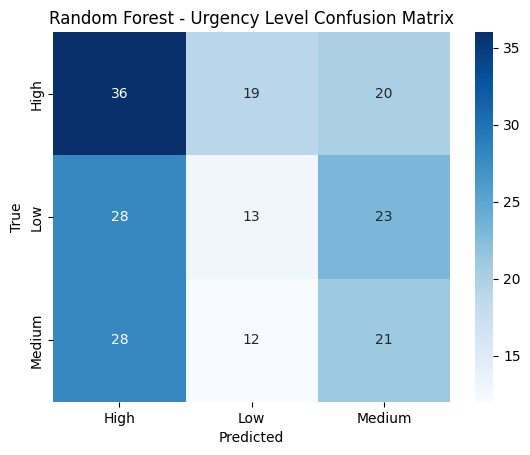

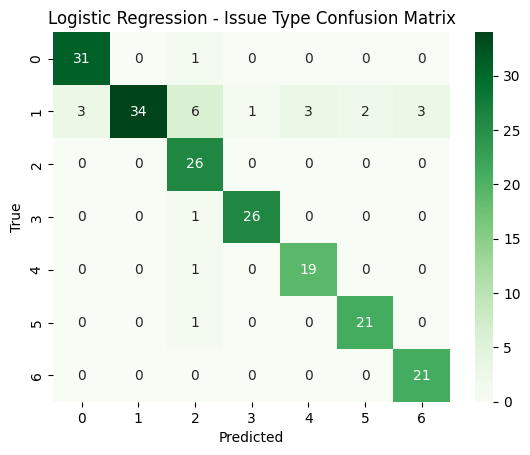

In [ ]:
cm_urgency = confusion_matrix(y_urgency_test, y_pred_rf)
sns.heatmap(cm_urgency, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_urgency.classes_,
            yticklabels=le_urgency.classes_)
plt.title("Random Forest - Urgency Level Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

cm_issue = confusion_matrix(y_issue_test, y_issue_pred)
sns.heatmap(cm_issue, annot=True, fmt='d', cmap='Greens')
plt.title("Logistic Regression - Issue Type Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# Model Prediction


In [ ]:
def preprocess_text(text):
    if not isinstance(text, str):
        return ''
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word]
    return ' '.join(tokens)


In [ ]:
product_list = ['router', 'modem', 'laptop', 'mobile', 'printer']
complaint_keywords = ['broken', 'late', 'error', 'not working', 'crash', 'failure', 'delay', 'lost']

def extract_entities(text):
    entities = {}
    products_found = [prod for prod in product_list if prod.lower() in text.lower()]
    entities['products'] = products_found

    date_pattern = r'\b(?:\d{1,2}[/\-\.]\d{1,2}[/\-\.]\d{2,4}|\d{4}[-/\.]\d{1,2}[-/\.]\d{1,2})\b'
    dates_found = re.findall(date_pattern, text)
    entities['dates'] = dates_found

    complaints_found = [kw for kw in complaint_keywords if kw in text.lower()]
    entities['complaints'] = complaints_found

    return entities


In [ ]:
def preprocess_and_predict_full(text):
    clean = preprocess_text(text)
    tfidf_vector = tfidf.transform([clean])

    char_count = len(text)
    word_count = len(text.split())
    sentiment = TextBlob(text).sentiment.polarity
    has_urgent_words = int(any(word in clean for word in ['urgent', 'asap', 'immediately', 'now', 'soon']))
    starts_with_urgent = int(clean.split()[0] in ['urgent', 'asap', 'immediately', 'now', 'soon'] if clean.split() else 0)
    exclam_count = text.count('!')
    question_count = text.count('?')
    punctuation_count = sum(1 for c in text if c in string.punctuation)

    extra_features = np.array([[char_count, word_count, sentiment, has_urgent_words,
                                starts_with_urgent, exclam_count, question_count, punctuation_count]])

    final_features = hstack([tfidf_vector, extra_features])
    issue = le_issue.inverse_transform([clf_issue.predict(final_features)[0]])[0]
    urgency = le_urgency.inverse_transform([clf_rf.predict(final_features)[0]])[0]
    entities = extract_entities(text)

    return {
        "issue_type": issue,
        "urgency_level": urgency,
        "extracted_entities": entities
    }


In [ ]:
iface = gr.Interface(
    fn=preprocess_and_predict_full,
    inputs=gr.Textbox(lines=5, placeholder="Enter your support ticket text here..."),
    outputs="json",
    title="Support Ticket Classifier",
    description="Predicts issue type, urgency level, and extracts key entities from a support ticket."
)

iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9eb97f02f8f0d3cbdb.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
